In [2]:
from gettext import install
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import pip
import seaborn as sns  
import nltk
import string
from nltk.corpus import stopwords  
from nltk.corpus import stopwords


In [3]:
# pip install fuzzywuzzy

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'C:\Users\MTR\OneDrive\Desktop\AxionRay\Task2.csv')  
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,1/2/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,1/3/2024,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,1/4/2024,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,1/4/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,1/5/2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2/7/2024,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,22222280KKBP0890,2820784987,4,1,Y,6NJ26,Sport,15.0,1,1
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2/7/2024,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2822282187,6,1,N,6MB26,NaN,10.0,0,1
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2/7/2024,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,21222222SKBP0119,2822042248,4,1,N,TNN26,Denali,10.0,0,1
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2/7/2024,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,Y0212811MRFX0180,2820879999,6,1,N,CC20943,2500,14.0,0,1


In [6]:
df.drop(columns=['CAMPAIGN_NBR'], inplace=True)

In [7]:
def column_analysis(df):  
    analysis_results = []  
    for col in df.columns:  
        analysis_results.append({  
            "Column Name": col,  
            "Data Type": df[col].dtype,  
            "Unique Values": df[col].nunique(),    
            "Significance": f"Important for understanding {col} related to vehicle service."  
        })  
    return pd.DataFrame(analysis_results)  

column_analysis_df = column_analysis(df)  
print(column_analysis_df)

                      Column Name Data Type  Unique Values  \
0                             VIN    object             98   
1                  TRANSACTION_ID     int64             32   
2             CORRECTION_VERBATIM    object             93   
3               CUSTOMER_VERBATIM    object            100   
4                     REPAIR_DATE    object             29   
5                  CAUSAL_PART_NM    object             18   
6   GLOBAL_LABOR_CODE_DESCRIPTION    object              4   
7                        PLATFORM    object             11   
8                      BODY_STYLE    object              6   
9                            VPPC    object             26   
10                          PLANT    object             11   
11                  BUILD_COUNTRY    object              3   
12            LAST_KNOWN_DLR_NAME    object            100   
13            LAST_KNOWN_DLR_CITY    object             94   
14          REPAIRING_DEALER_CODE    object             95   
15      

## Data Cleaning

In [8]:
df['CAUSAL_PART_NM'].fillna('Unknown', inplace=True)
df['PLANT'].fillna(df['PLANT'].mode()[0], inplace=True)
df['STATE'].fillna('Unknown', inplace=True)

# Addressing inconsistencies in categorical columns  
df['CAUSAL_PART_NM'] = df['CAUSAL_PART_NM'].str.lower().str.strip() 
df['TRANSMISSION_SOURCE_PLANT'].fillna(df['TRANSMISSION_SOURCE_PLANT'].mean(), inplace=True)
df['LAST_KNOWN_DELVRY_TYPE_CD'].fillna(df['LAST_KNOWN_DELVRY_TYPE_CD'].mean(), inplace=True)

df['TOTALCOST'] = pd.to_numeric(df['TOTALCOST'], errors='coerce')
df['TOTALCOST'].fillna(df['TOTALCOST'].median(), inplace=True)
df['REPAIR_DLR_POSTAL_CD'].fillna('Unknown', inplace=True)

In [9]:
df.columns

Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE',
       'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST',
       'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_DELVRY_TYPE_CD', 

In [10]:
# Drop rows where any of the specified columns have null values
df.dropna(subset=['VEH_TEST_GRP', 'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM'], inplace=True)
df.dropna(subset=['LINE_SERIES','ENGINE_SOURCE_PLANT','ENGINE_TRACE_NBR','TRANSMISSION_TRACE_NBR'], inplace=True)

In [ ]:
from fuzzywuzzy import process, fuzz
import re

def remove_special_characters(text):
    if pd.notnull(text):
        return re.sub(r'[^A-Za-z0-9 ]+', '', text)
    return text

# Apply to a column
df['CORRECTION_VERBATIM'] = df['CORRECTION_VERBATIM'].apply(remove_special_characters)
df['CUSTOMER_VERBATIM'] = df['CUSTOMER_VERBATIM'].apply(remove_special_characters)

In [11]:
#Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

#Check for outliers in each numerical column
outlier_info = {}
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_info[col] = outliers.index.tolist()  # Store indices of outliers
    print(f"Outliers detected in column '{col}': {len(outliers)}")
    if not outliers.empty:
        print(outliers)

Outliers detected in column 'TRANSACTION_ID': 4
                  VIN  TRANSACTION_ID  \
6   1HRFFHEL4RZ149960           13071   
9   1HRFFHEL8RZ133325           13074   
24  1HKS2JKR2NR336997           13073   
88  3HCFDDED5NH572905           13065   

                                  CORRECTION_VERBATIM  \
6   ACCESSED, REMOVED AND REPLACED THE DRIVERS ASS...   
9                          Steering Wheel Replacement   
24  replaced steering wheel no further action requ...   
88  AUTORIZACIÓN ACEPTADA, VOLANTE REEMPLAZADO PAR...   

                                    CUSTOMER_VERBATIM REPAIR_DATE  \
6   CUST. STATES DRIVERS ASSIST LIGHT COMES ON DAS...    1/5/2024   
9   Customer states that they are getting a messag...    1/9/2024   
24  CUSTOMER STATES STEERING WHEELS STICHING COMIN...   1/12/2024   
88  CS STEERING WHEEL LEATHER IS COMING UNDONE AT ...    2/5/2024   

                  CAUSAL_PART_NM GLOBAL_LABOR_CODE_DESCRIPTION  \
6      wheel asm-strg *jet black    Steering Whe

In [12]:
# # Convert numerical columns to the correct format and remove outliers  
# num_cols = ['REPAIR_AGE', 'KM', 'REPORTING_COST', 'TOTALCOST','COMPLAINT_CD_CSI']  
# for col in num_cols:  
#     df[col] = pd.to_numeric(df[col], errors='coerce') 
     
#     # Remove outliers using IQR method  
#     Q1 = df[col].quantile(0.25)  
#     Q3 = df[col].quantile(0.75)  
#     IQR = Q3 - Q1  
#     df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]  

## Identifying Critical Columns 

In [13]:
# Selecting top 5 critical columns based on their importance  
critical_columns = ['TRANSACTION_ID','REPAIR_AGE', 'KM', 'REPORTING_COST', 'TOTALCOST','COMPLAINT_CD_CSI']  
critical_column_analysis = df[critical_columns].copy()  


Top 5 Critical Columns

1. **TRANSACTION_ID**:
   - Serves as a unique identifier for each transaction, facilitating the tracking of individual records.
   - Essential for linking transactions to other relevant data entries.

2. **REPAIR_DATE**:
   - Captures the timeline of repairs and service activities, which is vital for analyzing trends and identifying delays.
   - Aids stakeholders in assessing service efficiency and recognizing peak periods for repairs.

3. **KM**:
   - Reflects the mileage and usage of the vehicle at the time of repair.
   - Important for identifying wear and tear patterns and for analyzing warranty claims.

4. **REPORTING_COST**:
   - Represents the expenses incurred for reporting issues or initiating repairs, serving as a key metric for understanding the financial impact of  service requests.
   - Important for evaluating service cost-effectiveness and identifying potential areas for cost reduction in the repair process.

5. **TOTALCOST**:
   - Represents the overall cost associated with the repair or service.
   - Crucial for conducting financial analyses, optimizing costs, and pinpointing high-cost repairs that may need further scrutiny.

6. **COMPLAINT_CD_CSI**:
   - Encodes the nature or severity of customer complaints, linked to the Customer Satisfaction Index (CSI).
   - Vital for analyzing customer satisfaction, enhancing service quality, and addressing prevalent complaints.



# Visualizations 

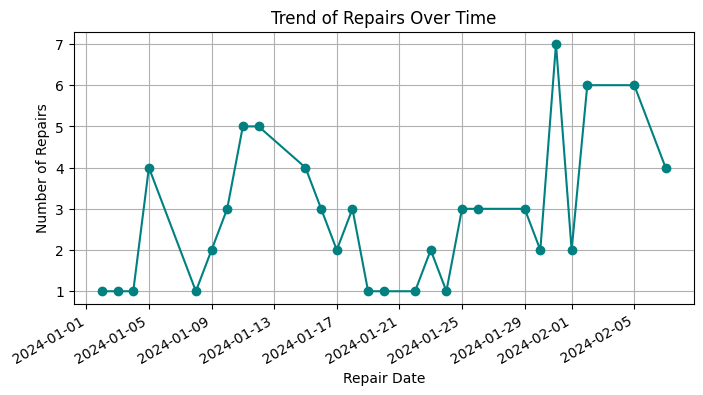

In [14]:
#Repair_Date Trend (Line Plot)
df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'])  
repair_date_trend = df['REPAIR_DATE'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
repair_date_trend.plot(kind='line', marker='o', color='teal')
plt.title('Trend of Repairs Over Time')
plt.xlabel('Repair Date')
plt.ylabel('Number of Repairs')
plt.grid(True)
plt.show()

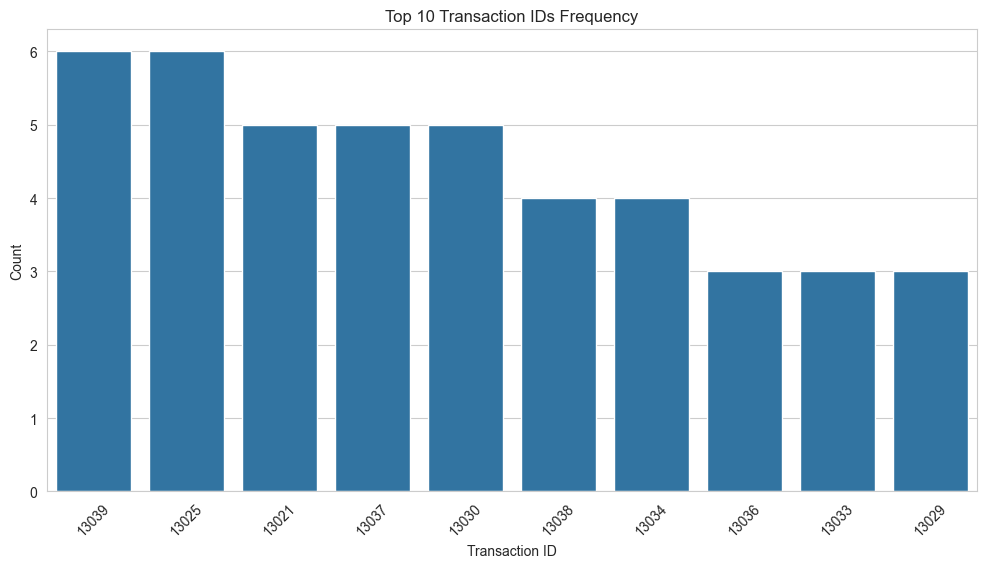

In [15]:
sns.set_style("whitegrid")

#Transaction ID Count (Bar Plot)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='TRANSACTION_ID', order=df['TRANSACTION_ID'].value_counts().index[:10])
plt.title('Top 10 Transaction IDs Frequency')
plt.xlabel('Transaction ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

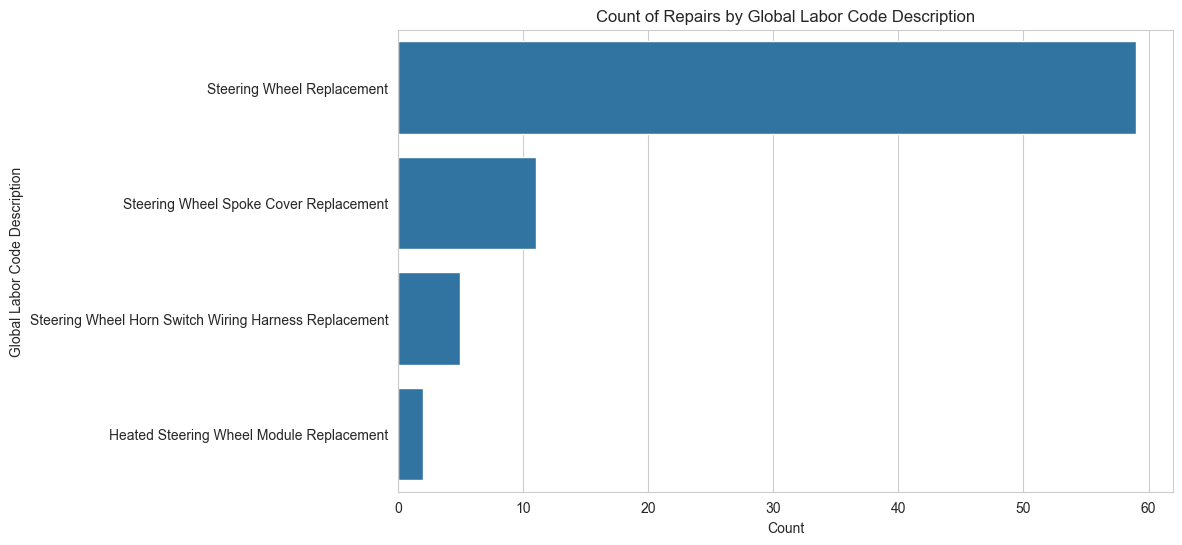

In [ ]:
# Count of Repairs by Global Labor Code Description  
plt.figure(figsize=(10, 6))  
sns.countplot(y='GLOBAL_LABOR_CODE_DESCRIPTION', data=df, order=df['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().index)  
plt.title('Count of Repairs by Global Labor Code Description')  
plt.xlabel('Count')  
plt.ylabel('Global Labor Code Description')  
plt.show() 

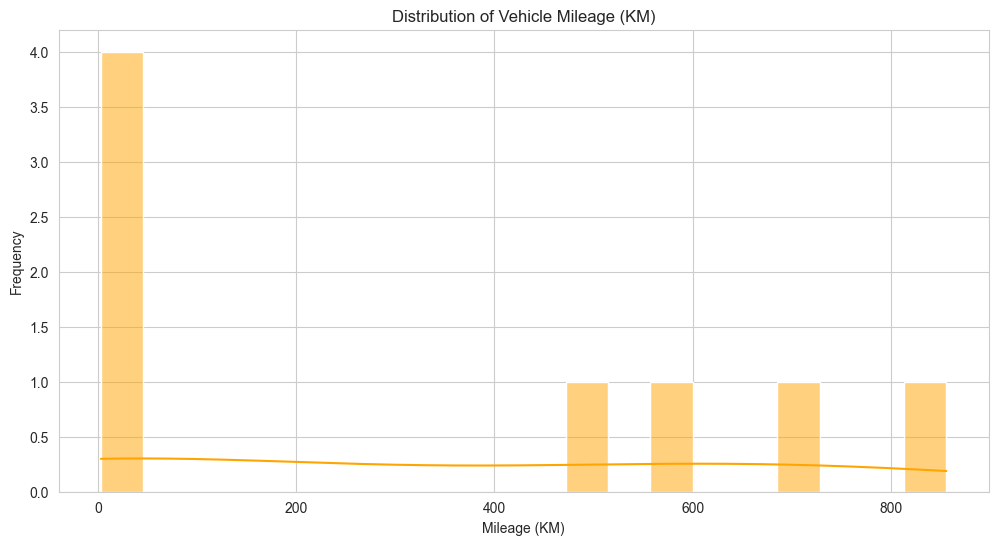

In [ ]:
# Mileage (KM) Distribution (Histogram)
plt.figure(figsize=(12, 6))
df['KM'] = pd.to_numeric(df['KM'], errors='coerce')  # Convert KM to numeric
sns.histplot(df['KM'], bins=20, kde=True, color='orange')
plt.title('Distribution of Vehicle Mileage (KM)')
plt.xlabel('Mileage (KM)')
plt.ylabel('Frequency')
plt.show()

## Summary and Insights 

From the analysis, we can summarize the common corrective actions related to steering wheel issues.  
The top tags associated with repairs include 'steering wheel', 'replacement', and 'module'.  
This indicates a significant focus on these components, suggesting potential improvements.  
Stakeholders should consider investigating the frequency of these parts and ways to improve their manufacturing or design.  

Actionable recommendations include:  
1. Investigate the steering wheel quality and consider redesigns if issues are prevalent.  
2. Pay attention to customer reports, particularly around heated elements.  
3. Monitor the repair trends over time to identify any seasonal or mileage-related issues that may arise. 

1. **Steering Wheel**
* Problems with steering functionality could indicate manufacturing defects or wear-and-tear issues.
* Safety concerns are likely a priority for stakeholders, as steering issues directly affect vehicle control.

2. **Customer State**
* This could provide geographical insights into regional trends or conditions (e.g., climate, road conditions) affecting vehicle performance.
* Identifying hotspots of complaints can help prioritize customer support and technical improvements.

3. **Heated Steering**
* This highlights a need to review the design or durability of heating components, especially in colder climates.
* Focused marketing or warranty coverage might mitigate customer dissatisfaction in this area.

4. **Replaced Steering**
* This may indicate a systemic issue with certain vehicle models requiring component replacement.
* Analysis of replacement trends can help reduce costs and improve product quality by addressing root causes.

**Product Improvement:**

* Focus on enhancing the reliability of the steering mechanism and associated features.
* Conduct a root cause analysis to address the need for frequent replacements.

**Customer Support:**

* Prioritize addressing customer concerns in regions with a high density of complaints (identified via "customer state").
* Develop specialized support for heated steering issues in colder climates.

**Quality Assurance:**

* Strengthen quality checks on critical components like steering wheels and heating elements during manufacturing.
* Monitor failure rates across different production batches for early detection of systemic issues.

**Marketing and Communication:**

* Emphasize improvements in the reliability of steering systems in future product releases.
* Offer extended warranties or discounts for frequently reported issues to enhance customer trust.

In [ ]:
# Discrepancies Found  
print("Discrepancies in the dataset:")  
print("Number of missing values in each column:")  
print(df.isnull().sum())  

Discrepancies in the dataset:
Number of missing values in each column:
VIN                              0
TRANSACTION_ID                   0
CORRECTION_VERBATIM              0
CUSTOMER_VERBATIM                0
REPAIR_DATE                      0
CAUSAL_PART_NM                   0
GLOBAL_LABOR_CODE_DESCRIPTION    0
PLATFORM                         0
BODY_STYLE                       0
VPPC                             0
PLANT                            0
BUILD_COUNTRY                    0
LAST_KNOWN_DLR_NAME              0
LAST_KNOWN_DLR_CITY              0
REPAIRING_DEALER_CODE            0
DEALER_NAME                      0
REPAIR_DLR_CITY                  0
STATE                            0
DEALER_REGION                    0
REPAIR_DLR_POSTAL_CD             0
REPAIR_AGE                       0
KM                               0
COMPLAINT_CD_CSI                 0
COMPLAINT_CD                     0
VEH_TEST_GRP                     0
COUNTRY_SALE_ISO                 0
ORD_SELLING_SRC_CD 

In [ ]:
# Saving cleaned data to CSV  
df.to_csv('cleaned_data.csv', index=False)  


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages  

# Summary of the analysis and visualizations  
import matplotlib.backends.backend_pdf  

with PdfPages('analysis_report.pdf') as pdf:   # type: ignore
    # Example of adding figures to the PDF  
    plt.figure()  
    sns.countplot(y='GLOBAL_LABOR_CODE_DESCRIPTION', data=df, order=df['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().index)  
    plt.title('Count of Repairs by Global Labor Code Description')  
    plt.xlabel('Count')  
    plt.ylabel('Global Labor Code Description')  
    pdf.savefig()  
    plt.close()  

    # Add further visualizations similarly  

print("Analysis completed and report generated!")  

Analysis completed and report generated!
